In [14]:
import pandas as pd

data = pd.read_csv("/Users/aryanthakur/Downloads/MACosmetics.csv")
data.head()

,text,created_at,polarity,label
0,@firstaidbeauty Bendy concealer @maccosmetics ...,2023-04-27 07:35:03+00:00,0.700,positive
1,Let the boycott begin 😎 @Maybelline @MACcosmet...,2023-04-27 06:05:33+00:00,0.000,neutral
2,@WeAreNot_OK @sweet_momster @darthothedead42 @...,2023-04-27 04:51:47+00:00,0.000,neutral
3,@WeAreNot_OK @sweet_momster @darthothedead42 @...,2023-04-27 04:49:17+00:00,0.125,positive
4,@LindaAb47675443 @spat64 @Maybelline @MACcosme...,2023-04-27 04:38:57+00:00,-0.250,negative


In [15]:
import nltk

nltk.download('punkt')

data['tokenized_tweets'] = data['text'].apply(nltk.word_tokenize)
data.head()

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


,text,created_at,polarity,label,tokenized_tweets
0,@firstaidbeauty Bendy concealer @maccosmetics ...,2023-04-27 07:35:03+00:00,0.700,positive,"[@, firstaidbeauty, Bendy, concealer, @, macco..."
1,Let the boycott begin 😎 @Maybelline @MACcosmet...,2023-04-27 06:05:33+00:00,0.000,neutral,"[Let, the, boycott, begin, 😎, @, Maybelline, @..."
2,@WeAreNot_OK @sweet_momster @darthothedead42 @...,2023-04-27 04:51:47+00:00,0.000,neutral,"[@, WeAreNot_OK, @, sweet_momster, @, darthoth..."
3,@WeAreNot_OK @sweet_momster @darthothedead42 @...,2023-04-27 04:49:17+00:00,0.125,positive,"[@, WeAreNot_OK, @, sweet_momster, @, darthoth..."
4,@LindaAb47675443 @spat64 @Maybelline @MACcosme...,2023-04-27 04:38:57+00:00,-0.250,negative,"[@, LindaAb47675443, @, spat64, @, Maybelline,..."


In [16]:
from gensim.models import Word2Vec
import pandas as pd


vocab = ['woman', 'man', 'mac', 'makeup', 'boycott', 'like', 'buy', 'product', 'make', 'use', 'people', 'think', 'know', 'wear', 'look', 'brand', 'company', 'good', 'bye', 'dylan', 'support', 'want', 'thank', 'say', 'real', 'care', 'year', 'need', 'right', 'face', 'hate', 've', 'stop', 'really', 'point']

tokenized_tweets = [[word for word in tweet if word in vocab] for tweet in data['tokenized_tweets']]

model = Word2Vec(tokenized_tweets, min_count=1)

similar_words = model.wv.most_similar('boycott')
print(similar_words)

[('care', 0.24954327940940857), ('woman', 0.1848566085100174), ('wear', 0.1784154325723648), ('like', 0.16849324107170105), ('good', 0.16626755893230438), ('say', 0.11306578665971756), ('think', 0.11107158660888672), ('company', 0.09954316169023514), ('stop', 0.06598242372274399), ('look', 0.05453133583068848)]


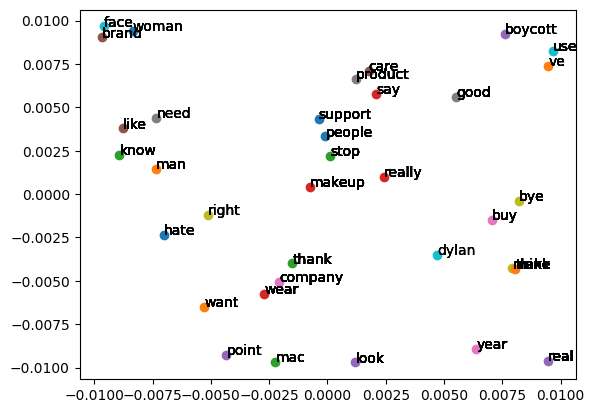

In [18]:
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

vocab = ['woman', 'man', 'mac', 'makeup', 'boycott', 'like', 'buy', 'product', 'make', 'use', 'people', 'think', 'know', 'wear', 'look', 'brand', 'company', 'good', 'bye', 'dylan', 'support', 'want', 'thank', 'say', 'real', 'care', 'year', 'need', 'right', 'face', 'hate', 've', 'stop', 'really', 'point']

tokenized_tweets = [[word for word in tweet if word in vocab] for tweet in data['tokenized_tweets']]

model = Word2Vec(tokenized_tweets, min_count=1)

word_vectors = model.wv[vocab]

for i, word in enumerate(vocab):
    similar_words = [w[0] for w in model.wv.most_similar(word)]
    similar_word_vectors = model.wv[similar_words]
    plt.scatter(word_vectors[i, 0], word_vectors[i, 1])
    for j, similar_word in enumerate(similar_words):
        plt.annotate(similar_word, xy=(similar_word_vectors[j, 0], similar_word_vectors[j, 1]))
plt.show()
